In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os 
import math
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product
from matplotlib.ticker import FormatStrFormatter


plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis

In [25]:
# Loading and describing data

df = pd.read_csv('aggregated_df_final01oct2021.csv')

# choosing the daterange
start_date = datetime(2018, 1, 1)
end_date = datetime(2021,10,1)
df['time'] = pd.to_datetime(df['time'])
mask = (df.time > start_date) & (df.time <= end_date)
df = df.loc[mask]
#-------------------------------

df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,1350,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.000000,1.350000e+03,...,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
unique,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-05-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15420.689459,15893.550252,14875.881800,15445.229023,15211.151670,3.538248e+07,52.376995,167.966990,1.112602e+08,...,37.709736,6.029347e+04,0.126202,0.357728,0.091105,0.230233,0.129457,0.348837,0.200000,0.091473
std,NaN,14966.420605,15460.476835,14377.740566,14989.839793,14644.325830,6.341081e+07,14.003292,1115.795815,6.150400e+08,...,16.386211,1.106460e+05,0.128018,0.084982,0.065147,0.421145,0.335836,0.476787,0.400155,0.288392
min,NaN,3212.871368,3268.953581,3158.130001,3212.983304,3500.468075,6.738494e+04,10.494657,-5072.114792,-2.322863e+09,...,19.075391,3.186316e+03,-0.367350,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6840.232500,7082.724491,6653.659926,6842.060625,6913.722953,9.038397e+05,42.958356,-224.001255,-3.174266e+07,...,25.231556,8.155116e+03,0.050928,0.300481,0.050801,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
# Setting index and extracting relevant features for time series analysis

df = df.set_index('time')
df = df.iloc[:,0:4]


<Figure size 432x288 with 0 Axes>

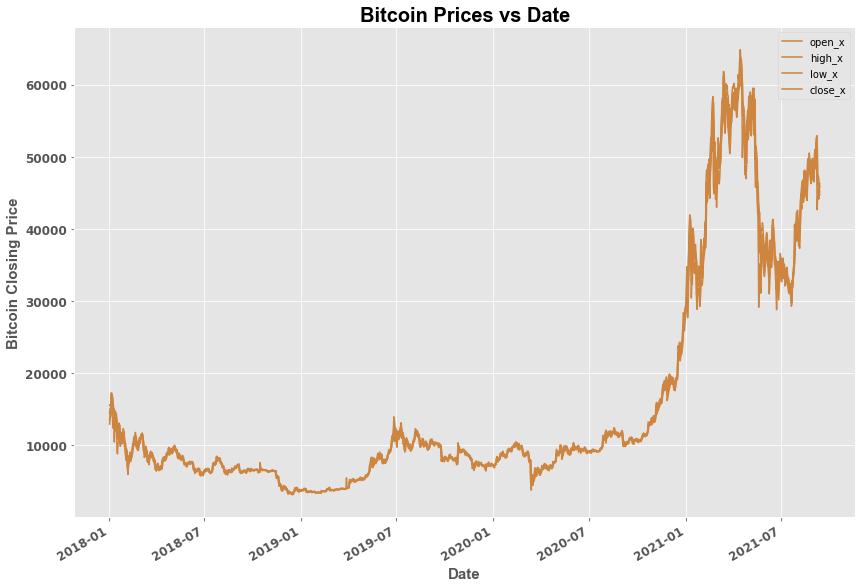

In [36]:
# Plotting movement of OHLC over the period 2017-2021

ax = plt.figure()

df.loc[:,df.columns].plot(figsize = (14,10),color='peru')
plt.title('Bitcoin Prices vs Date', fontfamily = 'arial', fontsize = 20,fontweight= 'bold', color= 'black')
plt.ylabel('Bitcoin Closing Price', fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xlabel('Date',fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xticks(size=12,fontweight= 'semibold')
plt.yticks(size=12,fontweight= 'semibold')
plt.show()

In [28]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)

In [29]:
# Resampling to monthly frequency
df_month = df.resample('M').mean()
print(df_month.tail())

                  open_x        high_x         low_x       close_x
time                                                              
2021-05-31  47065.703790  48800.607460  44181.988387  46411.918790
2021-06-30  35908.793458  37136.538542  34295.391917  35835.214250
2021-07-31  34226.748952  35212.825685  33360.301492  34433.861855
2021-08-31  45490.991331  46722.958911  44364.954758  45673.510323
2021-09-30  48236.732083  49391.918021  46617.895729  48139.378438


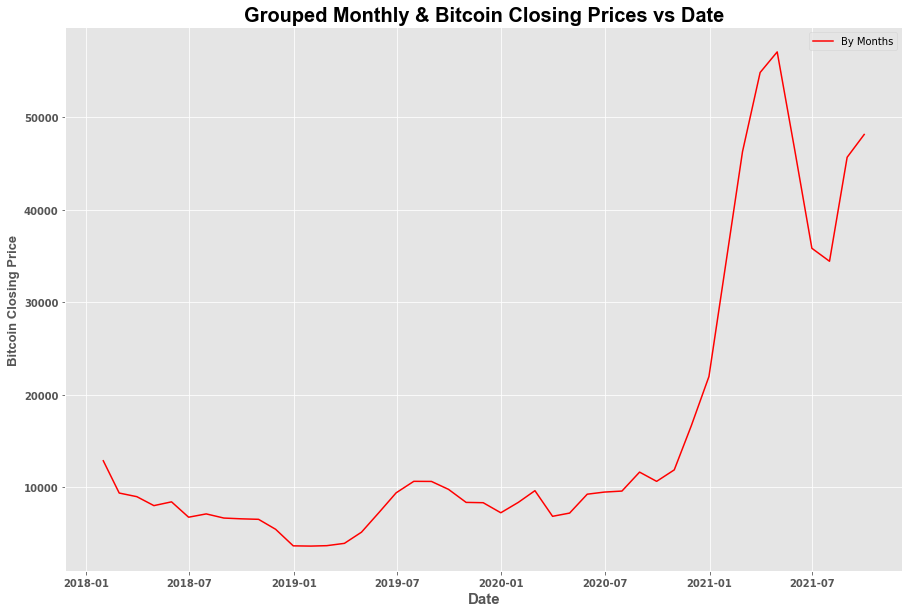

In [30]:
# Plotting subplots of OHLC by months
fig = plt.figure(figsize=[15,10])


plt.title('Grouped Monthly & Bitcoin Closing Prices vs Date', fontfamily = 'arial', fontsize=20,fontweight='bold', color= 'black')

plt.plot(df_month.close_x, '-', label='By Months', color ='red')
plt.xlabel('Date',fontfamily = 'arial', fontsize=15, fontweight= 'bold')
plt.ylabel('Bitcoin Closing Price',fontfamily = 'arial', fontsize=13,fontweight= 'bold')
plt.xticks(size=10,fontweight= 'bold')
plt.yticks(size=10,fontweight= 'bold')
plt.legend()

plt.show()

### Checking Stationarity - Augmented Dickey Fuller Test

Dickey–Fuller test: p=0.906447


<Figure size 1440x720 with 0 Axes>

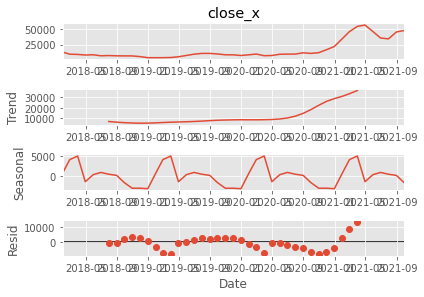

In [31]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
plt.xlabel('Date')
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

### Box-Cox Transformation for Stationarity

Dickey–Fuller test: p=0.864933


Text(0.5, 14.999999999999972, 'Date')

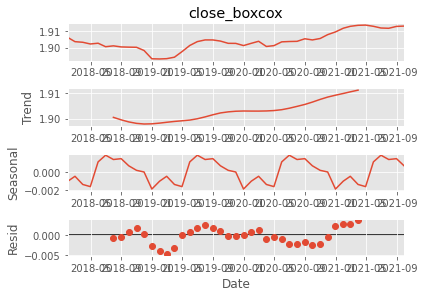

In [32]:
# Box-Cox Transformations

df_month['close_boxcox'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_boxcox)[1])
sm.tsa.seasonal_decompose(df_month.close_boxcox).plot();
plt.xlabel('Date')

### Differencing for Stationarity

In [33]:
# First order differencing

df_month.diff1 = df_month.close_x.diff()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.diff1[1:])[1])

Dickey–Fuller test: p=0.000048


In [34]:
# Second order differencing

df_month.diff2 = df_month.close_boxcox.diff(2).dropna()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.diff2[2:])[1])

Dickey–Fuller test: p=0.000512


Basis the second order differencing, we observe that the time series data is stationary as p-value is less than 0.05

### Plotting Autocorrelation (ACF) & Partial Autocorrelation (PACF) Plots

Autocorrelation  refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. 

After plotting the ACF plot we move to Partial Autocorrelation Function plots (PACF). A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.


Source: https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06]

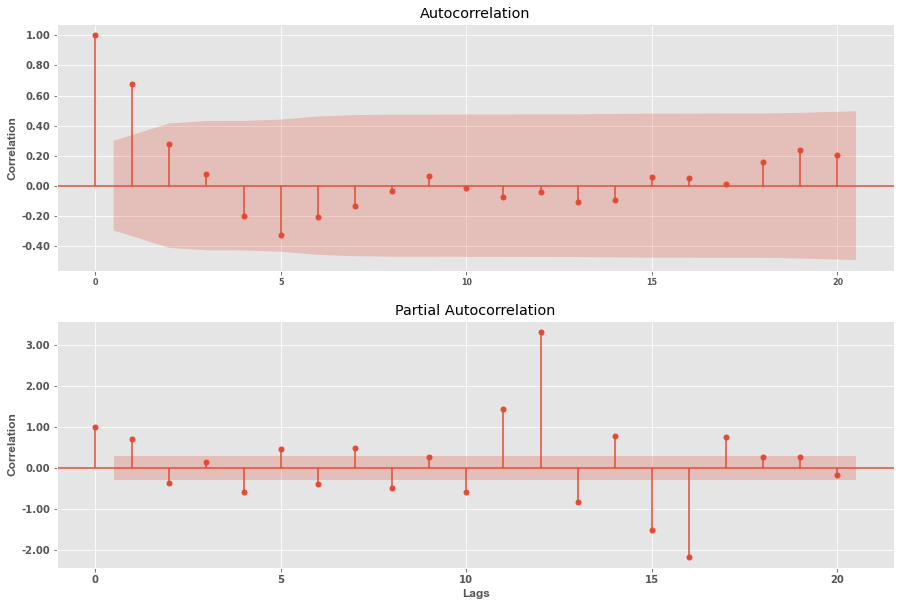

In [35]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.diff2, lags=20, ax=ax)
plt.ylabel('Correlation', fontfamily = 'arial', fontsize=12,fontweight= 'bold')
plt.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.xticks(size=8,fontweight= 'bold')
plt.yticks(size=10,fontweight= 'bold')
ax = plt.subplot(212)
plt.ylabel('Correlation', fontfamily = 'arial', fontsize=12,fontweight= 'bold')
plt.xticks(size=10,fontweight= 'bold')
plt.yticks(size=10,fontweight= 'bold')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
sm.graphics.tsa.plot_pacf(df_month.diff2, lags=20,  ax=ax)
plt.xlabel('Lags',fontsize=12, fontfamily = 'arial',fontweight= 'bold')

plt.show()



From the above plots, we derive that ther is one significant lag for ACF plot, while there are many significant spikes in the PACF plot. Further, we could see a seasonal component present as well in the above plots.

In such a case, we decided to apply the ARIMA model which also takes consideration the seasonality element, a technique called the SARIMA modelling.

### SARIMA Modelling

In [13]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [14]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [15]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
13  (0, 2, 0, 1)  630.809867
12  (0, 2, 0, 0)  631.102089
37  (2, 0, 0, 1)  631.183538
40  (2, 0, 2, 0)  631.342448
16  (0, 2, 2, 0)  631.682653
                                      SARIMAX Results                                       
Dep. Variable:                              close_x   No. Observations:                   45
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -311.405
Date:                              Sun, 03 Oct 2021   AIC                            630.810
Time:                                      14:04:01   BIC                            636.673
Sample:                                  01-31-2018   HQIC                           632.753
                                       - 09-30-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

From the above result, we observe that ar.L1, ar.L2 and ma.L2 have significant values

### Analysis of Results

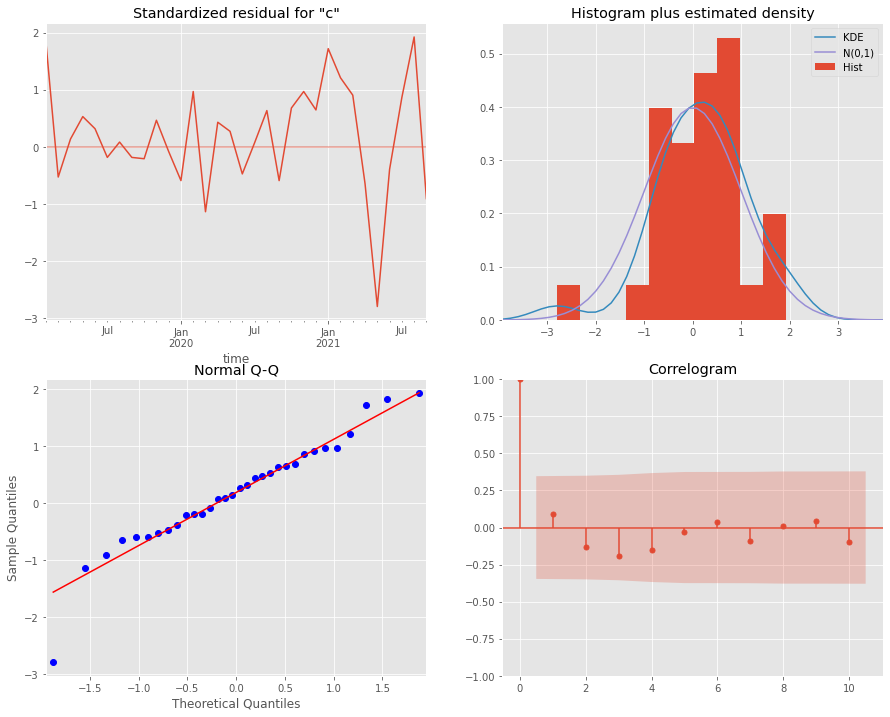

In [16]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000017


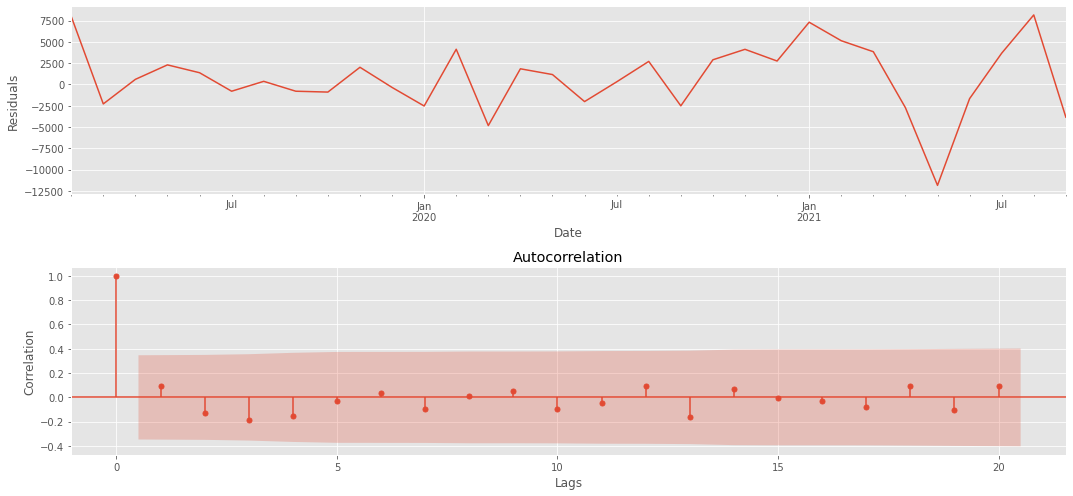

In [17]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.xlabel('Date')
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Correlation')

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

### Prediction  - BTC Close Price

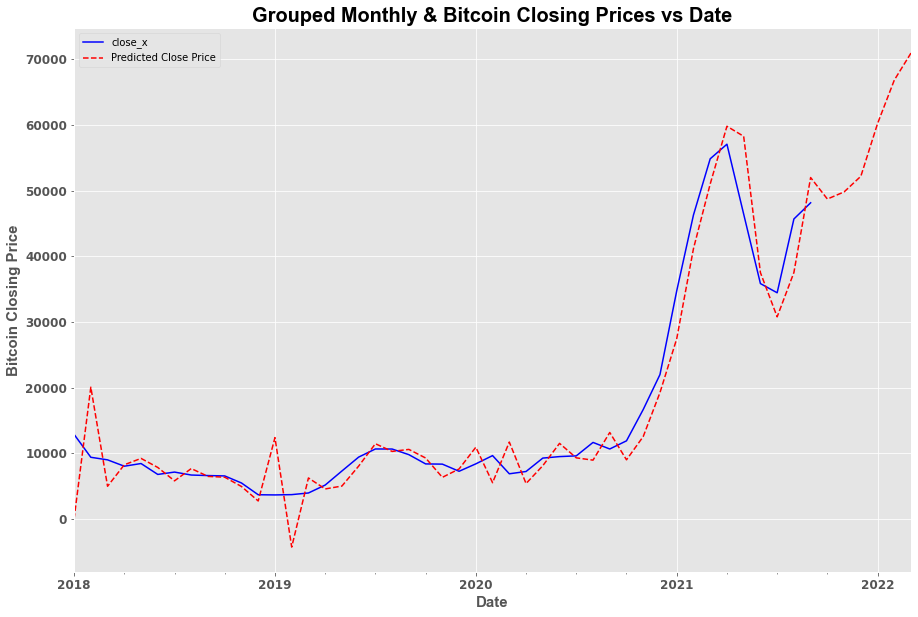

In [23]:
# Prediction

df_month2 = df_month[['close_x']]
date_list = [datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31),datetime(2022, 1, 31),datetime(2022, 2, 28),datetime(2022, 3, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=75)
plt.figure(figsize=(15,10))
df_month2.close_x.plot(color='b')
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Grouped Monthly & Bitcoin Closing Prices vs Date',fontfamily = 'arial', fontsize=20,fontweight= 'bold')
plt.ylabel('Bitcoin Closing Price', fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xlabel('Date',fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xticks(size=12,fontweight= 'semibold')
plt.yticks(size=12,fontweight= 'semibold')
plt.show()


### Evaluation of Results

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

def check_error(orig, pred, name_col='', index_name=''):
    
    bias = np.mean(orig - pred)
    mse = mean_squared_error(orig, pred)
    rmse = sqrt(mean_squared_error(orig, pred))
    mae = mean_absolute_error(orig, pred)
    mape = np.mean(np.abs((orig - pred) / orig)) * 100
    
    error_group = [bias, mse, rmse, mae, mape]
    series = pd.DataFrame(error_group, index=['BIAS','MSE','RMSE','MAE', 'MAPE'], columns=[name_col])
    series.index.name = index_name
    
    return series

In [20]:
df_month3 = df_month2[['close_x','forecast']].dropna()
orig = df_month3['close_x']
pred = df_month3['forecast']
check_error(orig, pred)

,
,
BIAS,5.115252e+02
MSE,2.005718e+07
RMSE,4.478524e+03
MAE,3.160006e+03
MAPE,3.146087e+01


<b> Conclusion: The SARIMA modelling predicts BTC close price with an RMSE of 4478.52</b>